In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ssp
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

##### First few data from dataset

In [2]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Checking for any null data in dataset

In [3]:
boston_df.isna()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### General descriptive statistics of dataset using describe()

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## For all visualizations, please include a title in each graph and appropriate labels

#### Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

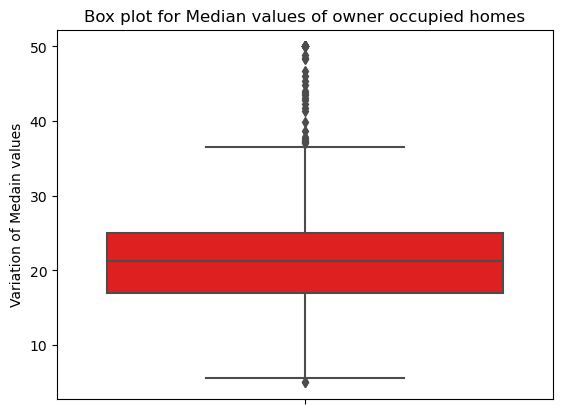

In [5]:
# median value of owner-occupied homes
# from dataset MEDV - Median value of owner-occupied homes in $1000's and here is a code for vertical box plot
b_plt = sns.boxplot(y='MEDV',data =boston_df,color='red')
plt.title('Box plot for Median values of owner occupied homes')
plt.ylabel('Variation of Medain values')
plt.show()

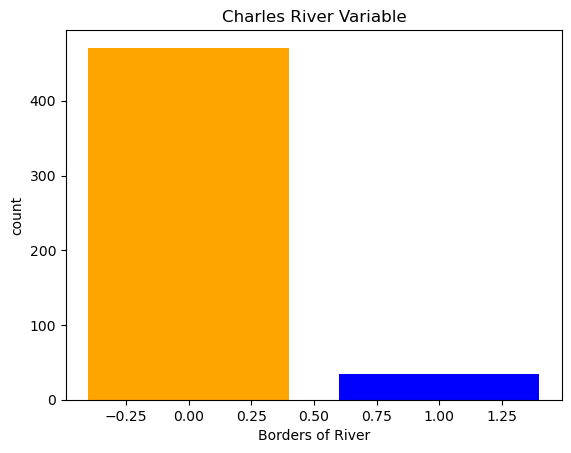

In [6]:
#Provide a bar plot for the Charles river variable
#from dataset CHAS - Charles River dummy variable and here is a code for bar chart
count_CHAS = boston_df.groupby('CHAS').size()
bar_plt = plt.bar(count_CHAS.index, count_CHAS.values, color=('orange', 'blue'))
plt.title('Charles River Variable')
plt.xlabel('Borders of River')
plt.ylabel('count')
plt.show()

In [7]:

#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
#from dataset: AGE - proportion of owner-occupied units built prior to 1940

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35', '35 TO 70', '>70'])
print(boston_df[['AGE', 'AGE_GROUP']].head(10))


     AGE AGE_GROUP
0   65.2  35 TO 70
1   78.9       >70
2   61.1  35 TO 70
3   45.8  35 TO 70
4   54.2  35 TO 70
5   58.7  35 TO 70
6   66.6  35 TO 70
7   96.1       >70
8  100.0       >70
9   85.9       >70


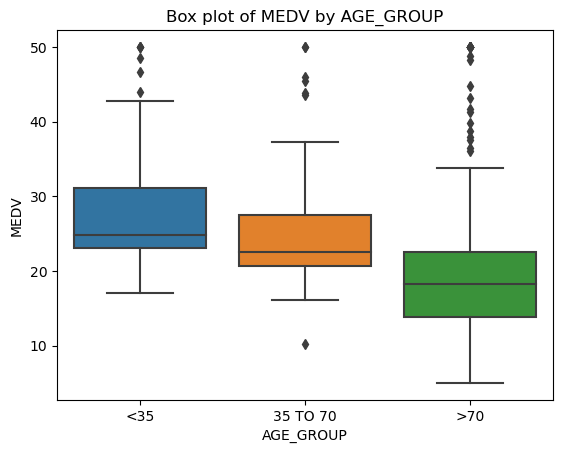

In [8]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
b_plt = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
b_plt.set_title('Box plot of MEDV by AGE_GROUP')
b_plt.set_xlabel('AGE_GROUP')
b_plt.set_ylabel('MEDV')
plt.show()

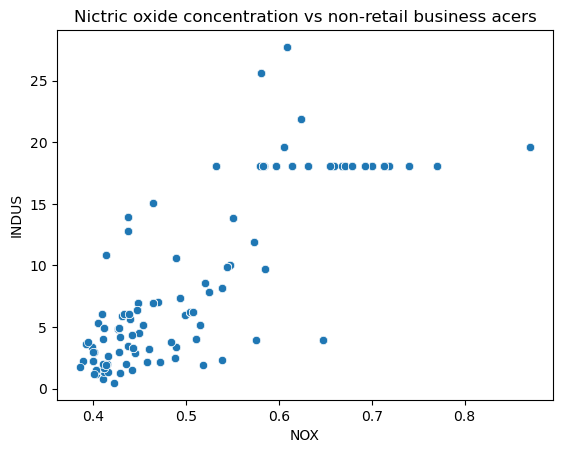

In [9]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# From dataset:  NOX - nitric oxides concentration (parts per 10 million) and INDUS - proportion of non-retail business acres per town.
s_plt = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
s_plt.set_title('Nictric oxide concentration vs non-retail business acers')
s_plt.set_xlabel('NOX')
s_plt.set_ylabel('INDUS')
plt.show()

##### What can you say about relationship ?

##### Both variables are continously changing.   The y-variable INDUS is a proportion of non-retail business acres per town and the x-variable NOX is nitric oxides concentration (parts per 10 million). The scatter plot indicates the as INDUS increases the NOX descreases. Both are inversely dependent to each other.

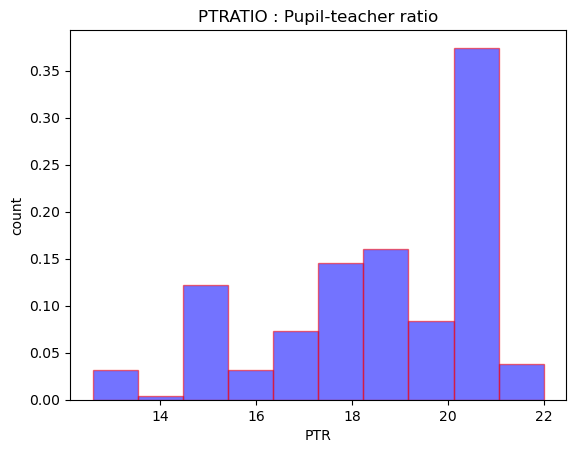

In [30]:
#Create a histogram for the pupil to teacher ratio variable
#from dataset PTRATIO - pupil-teacher ratio by town
boston_df['PTRATIO'].plot(kind = 'hist',density=True, alpha=0.55, color = 'blue',edgecolor='red')
plt.title('PTRATIO : Pupil-teacher ratio')
plt.xlabel('PTR')
plt.ylabel('count')
plt.show()

## For each of the following questions;

> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

> What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
##### Hypothesis : 
* H_0 : Null hypothesis : There is no significant difference in median value of houses bounded by the Charles river or not
* H_1 : Alternate hypothesis : There is significant difference in median value of houses bounded by the Charles river or not.

In [38]:
ssp.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])


Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

###### Result is : pvalue : 0.00000739 which is less than P (0.05) so we null hypothesis will be rejected. 
###### Conclusion: So, there is significant difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA))
##### Hypothesis : 
* H_0 : Null hypothesis : There is no difference in median value of houses (MEDV) for each AGE
* H_1 : Alternate hypothesis : There is difference in median value of houses (MEDV) for each AGE

In [53]:
# Discretize the AGE column into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35', '35-70', '>70'])

# Perform one-way ANOVA
f_statistic, p_value = ssp.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '<35']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV'])
print("F-Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))


F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### P value is less than 0.05 so I will reject null hypothesis with conclusion that Alternate hypothesis is true.
###### there is significant difference in median value of houses for each AGE.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##### Hypothesis : 
* H_0 : Null hypothesis : There is no relationship between NOX and INDUS
* H_1 : Alternate hypothesis : There is relationship between NOX and INDUS

In [57]:
# from the dataset : NOX - nitric oxides concentration (parts per 10 million) and INDUS - proportion of non-retail business acres per town 
corr_coef, p_value = ssp.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(corr_coef, p_value)

0.7636514469209151 7.913361061238693e-98


##### P value is less than 0.05 so I will reject null hypothesis with conclusion that Alternate hypothesis is true.
###### there is a relationship between NOX and INDUS.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
##### Hypothesis : 
* H_0 : Null hypothesis : There is no impact.
* H_1 : Alternate hypothesis : There is impact.

In [58]:
# from the dataset (Regression analysis): DIS - weighted distances to five Boston employment centres, MEDV - Median value of owner-occupied homes in $1000's

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.21e-08
Time:                        05:28:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

###### Result : R-squared : 0.062 so co-relation coefficient: 0.248, Probability P <0.05 . 
##### So null hypothesis is rejected. 
###### Conclusion: The impact is statistically significant. The coefficient of DIS is 1.0916, which implies that for every unit increase in the weighted distance to the employment centers, there is an average increase of 1,091.6 in the median value of owner-occupied homes. 